## Week 3: Simple 2-mode Network 

Mael Illien, Jeremy O'Brien, Vanita Thompson

### Assignment:

The [Davis Southern Club women](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis) is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events.

DATASET: [DAVIS](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/davis.dat)

DESCRIPTION: One 18×14 matrix, binary.

BACKGROUND: These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

What can you infer about the relationships between (1) the women, and (2) the social events?

### Load Libraries

In [4]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from scipy import stats
from pylab import rcParams
import math
%matplotlib inline

## Data Import and Exploration

The Davis Southern Club Women data set was collected by Davis et al. This data set is also included with the NetworkX package and comes as a bipartite graph (clubs, women) with event attendance data.

In [5]:
#loading data from the networkx package
G = nx.davis_southern_women_graph()

Previewing some details, starting with nodes and edges.

In [6]:
G.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

There are  2 modes - women and events.

In [7]:
#G.edges()

The edges represent women's attendance to an event.

In [8]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


nx.info provides a total number of nodes (number of women plus number of events) and edges (total number of attendees at each event). Additionally, we compute an average degree, which, in this 2-mode dataset, and is a mix of average events attended by women and average number of women at events.

### Visualization

Visualizing a 2-mode network, utilizing a nodelist to distinguish between women and events.

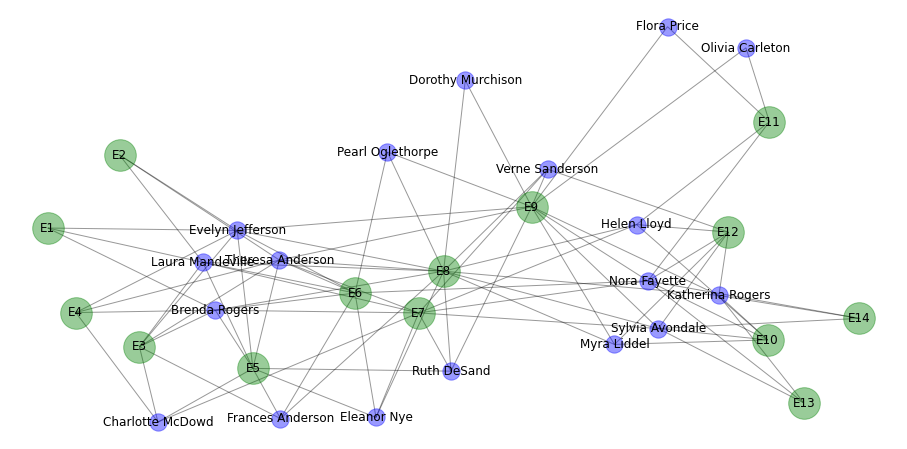

In [9]:
women, events = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='blue', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='green', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

The fourteen events and the eighteen women have various connections. From the above, you can tell that, among the events, the seventh, eighth, and ninth events had the most participants.  Among women, Evelynn Jefferson, Theresa Anderson, and Nora Fayette attended the most events. We'll see this calculated using networkx distance measures next.

Looking at the graph, you can there are at least two distinct cliques, each of which had four events that were attended almost only by those cliques. And there are a handful of events attended by women from both cliques and women who do not appear to belong to either of the clear cliques. We'll look more at these later.

Now, back to the distance measures.

In [10]:
print('center =', nx.center(G))
print('diameter =', nx.diameter(G))
print('radius =', nx.radius(G))

center = ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']
diameter = 4
radius = 3


In [9]:
list(G.degree())

[('Evelyn Jefferson', 8),
 ('Laura Mandeville', 7),
 ('Theresa Anderson', 8),
 ('Brenda Rogers', 7),
 ('Charlotte McDowd', 4),
 ('Frances Anderson', 4),
 ('Eleanor Nye', 4),
 ('Pearl Oglethorpe', 3),
 ('Ruth DeSand', 4),
 ('Verne Sanderson', 4),
 ('Myra Liddel', 4),
 ('Katherina Rogers', 6),
 ('Sylvia Avondale', 7),
 ('Nora Fayette', 8),
 ('Helen Lloyd', 5),
 ('Dorothy Murchison', 2),
 ('Olivia Carleton', 2),
 ('Flora Price', 2),
 ('E1', 3),
 ('E2', 3),
 ('E3', 6),
 ('E4', 4),
 ('E5', 8),
 ('E6', 8),
 ('E7', 10),
 ('E8', 14),
 ('E9', 12),
 ('E10', 5),
 ('E11', 4),
 ('E12', 6),
 ('E13', 3),
 ('E14', 3)]

In this case, degrees represent the number of events a woman attended.

The bipartite graph focuses only on the women nodes, removing the events. If a woman attended an event with another, we assume they're friends. 

## Data Analysis - Unipartite Representation

### Women Network

We use the unipartite representation to transform a 2-node network into a one node network where edges are weighted by the number of events these women attended in common.

In [81]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
# Summary statics for women-only node network
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


In [83]:
print("#Friends, Member")
for w in sorted([(W.degree(w),w) for w in women], reverse=True):
    print('%d %s' % (w))

#Friends, Member
17 Verne Sanderson
17 Theresa Anderson
17 Sylvia Avondale
17 Ruth DeSand
17 Nora Fayette
17 Helen Lloyd
17 Evelyn Jefferson
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Frances Anderson
15 Eleanor Nye
15 Brenda Rogers
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd


Charlotte McDowd, who appears in the lower left clique in our original 2-mode visualization, has only 11 "friends," which matches what we saw.

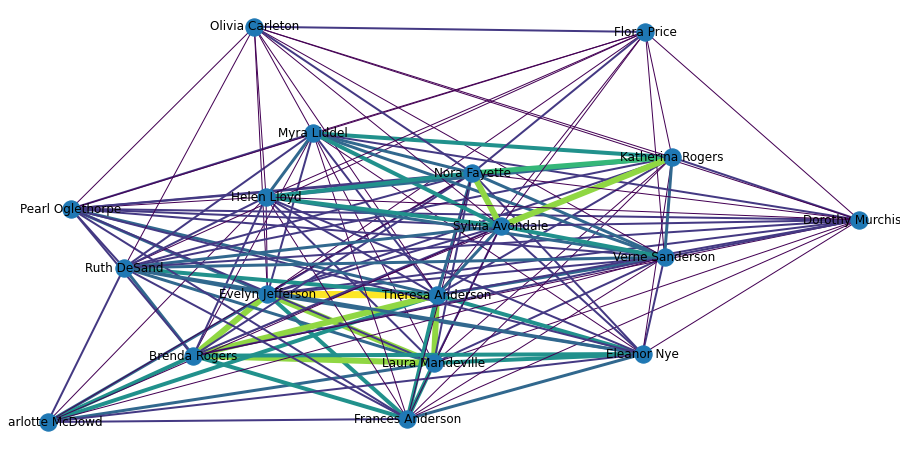

In [102]:
# Above data shows the number of friends each woman has.  The following shows the detialed relationship amoung this group.
W = bipartite.weighted_projected_graph(G, women,ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(W, k=0.1,iterations=20, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

From the graph above, it appears that there are two groups of women with particularly strong relationships. These are: 
- Theresa Anderson, Brenda Rogers, Laura Mandeville and Evelyn Jefferson
- Nora Fayette, Sylvia Avondale and Katherina Rogers

In fact, these women form cliques as shown below.

In [91]:
# A function to trim weak connections from the graph
def trim_edges(g, weight=1): 
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            g2.add_edge(f,to,**edata)
    return g2

The returned cliques below correspond to the what was identified visually in the graph above.

In [92]:
trimmed = trim_edges(W,4)
cliques = list(nx.find_cliques(trimmed))
cliques

[['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers'],
 ['Katherina Rogers', 'Nora Fayette', 'Sylvia Avondale']]

In [93]:
# Women Cliques. MI: I think this is too many and doesn't tell us much. See trimmed cliques above.
list(nx.find_cliques(W))

[['Evelyn Jefferson',
  'Helen Lloyd',
  'Nora Fayette',
  'Theresa Anderson',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Pearl Oglethorpe',
  'Myra Liddel',
  'Katherina Rogers',
  'Dorothy Murchison',
  'Flora Price',
  'Olivia Carleton'],
 ['Evelyn Jefferson',
  'Helen Lloyd',
  'Nora Fayette',
  'Theresa Anderson',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Pearl Oglethorpe',
  'Myra Liddel',
  'Katherina Rogers',
  'Dorothy Murchison',
  'Laura Mandeville',
  'Eleanor Nye',
  'Brenda Rogers',
  'Frances Anderson'],
 ['Evelyn Jefferson',
  'Helen Lloyd',
  'Nora Fayette',
  'Theresa Anderson',
  'Verne Sanderson',
  'Sylvia Avondale',
  'Ruth DeSand',
  'Charlotte McDowd',
  'Laura Mandeville',
  'Frances Anderson',
  'Eleanor Nye',
  'Brenda Rogers']]

Removing the events from the dataset, we see two cliques, though they are larger than we might have drawn when looking at the two-node graph.

### Social Events Network

We repeat the bipartite steps to isolate the events network.

In [105]:
E = bipartite.weighted_projected_graph(G, events,ratio=False)
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


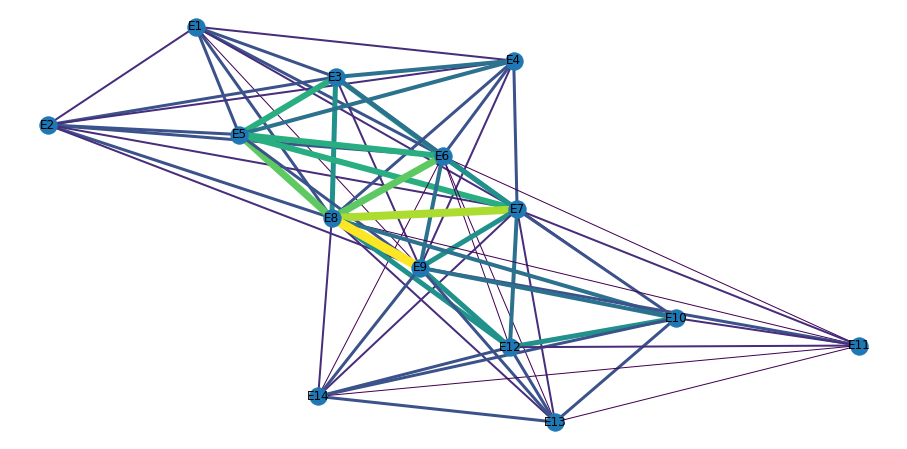

In [104]:

weights = [edata['weight'] for f,t,edata in E.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(E, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

### Analysis

In [44]:
# Degree centrality (number of women attend the events)
d_E = E.degree(E)
pd.DataFrame(d_E, columns=["Social Events", "Degree"])

,Social Events,Degree
0,E3,8
1,E1,8
2,E4,8
3,E10,8
4,E6,13
5,E8,13
6,E7,13
7,E13,8
8,E12,8
9,E11,8


## Conclusion